In [20]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

root = "data/"
out = "asl_train"
size = 128

folders = os.listdir(root)
folders.sort()

# print(folders)

In [27]:
# make folders for each letter in the output directory

# for folder in folders:
#     if "train" in folder:
#         alphabet_folder = os.listdir(root + folder)

#         for alphabet in alphabet_folder:
#             print(alphabet)
#             if not os.path.exists(out + "/" + alphabet):
#                 os.makedirs(out + "/" + alphabet)
#         break

A
B
C
D
del
E
F
G
H
I
J
K
L
M
N
nothing
O
P
Q
R
S
space
T
U
V
W
X
Y
Z


In [21]:
train_folder = os.listdir(out)

for a_out_folder in train_folder:
    save_path = f"{out}/{a_out_folder}"
    print(save_path)
    i = 1
    
    for root_folder in folders:
        a_root_files = os.listdir(root + root_folder + "/" + a_out_folder)
        
        for file in a_root_files:
            read_path = root + root_folder + "/" + a_out_folder + "/" + file
            
            # use PIL to convert to 128x128 and save to save_path
            img = Image.open(read_path)
            img = img.resize((size, size))
            img.save(f"{save_path}/{i}.jpg")

            i += 1

            if i%1000 == 0:
                print(read_path ,"=> ", f"{save_path}/{i}.jpg")
                # print(".", end= "")

asl_train/A
data/asl_alphabet_train/A/A1898.jpg =>  asl_train/A/1000.jpg
data/asl_alphabet_train/A/A2798.jpg =>  asl_train/A/2000.jpg
data/asl_alphabet_train/A/A998.jpg =>  asl_train/A/3000.jpg
data/asl_alphabet_train2/A/A (1411).jpg =>  asl_train/A/4000.jpg
data/asl_alphabet_train2/A/A (2311).jpg =>  asl_train/A/5000.jpg
data/asl_alphabet_train2/A/A (3211).jpg =>  asl_train/A/6000.jpg
data/asl_alphabet_train2/A/A (4111).jpg =>  asl_train/A/7000.jpg
data/asl_alphabet_train2/A/A1214.jpg =>  asl_train/A/8000.jpg
data/asl_alphabet_train2/A/A2114.jpg =>  asl_train/A/9000.jpg
data/asl_alphabet_train2/A/A314.jpg =>  asl_train/A/10000.jpg
data/asl_alphabet_train2/A/a_32_rotate_1.jpeg =>  asl_train/A/11000.jpg
asl_train/B
data/asl_alphabet_train/B/B1898.jpg =>  asl_train/B/1000.jpg
data/asl_alphabet_train/B/B2798.jpg =>  asl_train/B/2000.jpg
data/asl_alphabet_train/B/B998.jpg =>  asl_train/B/3000.jpg
data/asl_alphabet_train2/B/B (1451).jpg =>  asl_train/B/4000.jpg
data/asl_alphabet_train2/B/B 

(128, 128, 3)


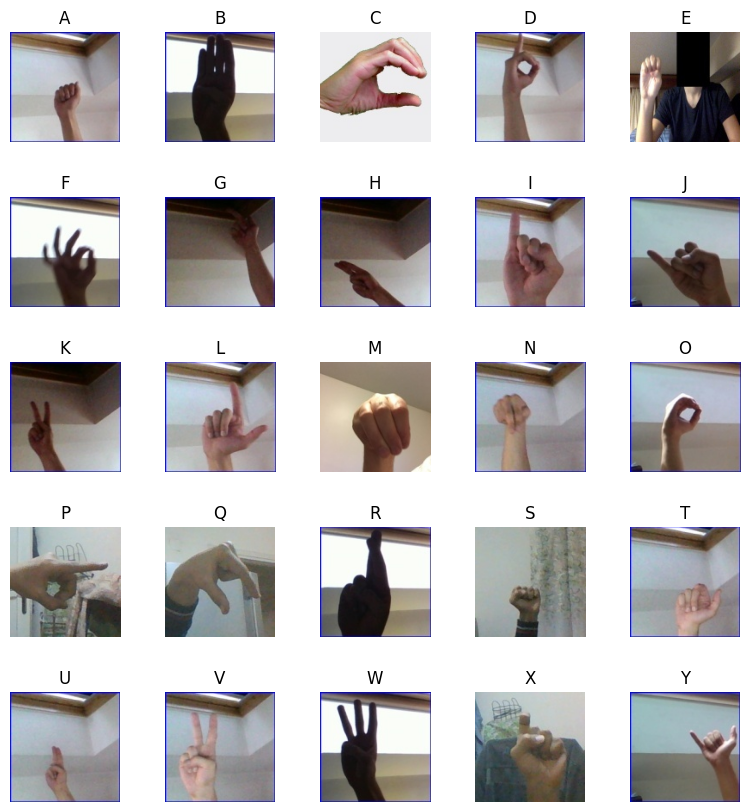

In [21]:
# visualize random images from each class
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace = 0.5, wspace=.001)
axs = axs.ravel()

# print shape of one of the images
print(plt.imread("./data/train/"+folders[0]+"/"+os.listdir("./data/train/"+folders[0])[0]).shape)

for i in range(25):
    axs[i].imshow(plt.imread("./data/train/"+folders[i]+"/"+os.listdir("./data/train/"+folders[i])[0]))
    axs[i].set_title(folders[i])
    axs[i].axis('off')
plt.show()

Shape of the image is:  (128, 128)


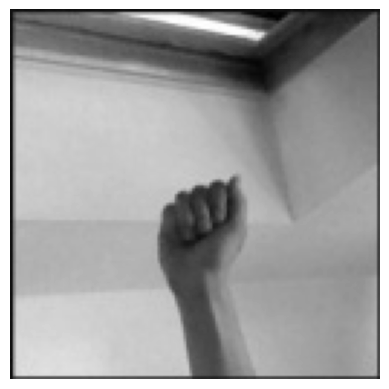

In [20]:
#use cv2 to diplay grayscale version of one the images
img = cv2.imread("./data/train/A/1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# print shape of the image
print("Shape of the image is: ", gray.shape)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()



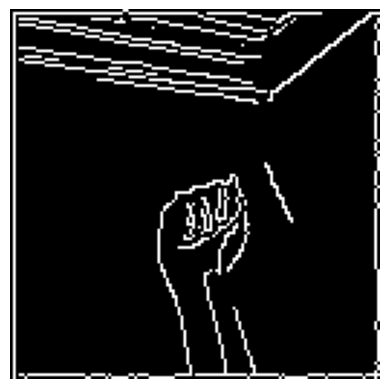

In [26]:
edges = cv2.Canny(gray, 80, 120)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [38]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor,Resize,Compose,Normalize,RandomRotation,RandomHorizontalFlip,RandomVerticalFlip,RandomResizedCrop,ColorJitter
#recommend more transforms like normalization, rotation, etc


from torch.utils.data.dataloader import DataLoader

root = "./data/"
BATCH_SIZE = 7

train_ds = ImageFolder(root+"train", Compose([Resize(128), RandomRotation(30), ColorJitter() ,ToTensor()]))
train_dl = DataLoader(train_ds, BATCH_SIZE, shuffle=True, pin_memory=True)

# val_ds = ImageFolder(root+"val", Compose([Resize(128),ToTensor()]))
# val_dl = DataLoader(val_ds, 49, pin_memory=True)

print(len(train_ds))
img_cls = train_ds.classes

CLS_SIZE = len(img_cls)

print(img_cls)

print("Shape of the image is: ", train_ds[0][0].shape)

1274
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Shape of the image is:  torch.Size([3, 128, 128])


In [39]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch.cuda.empty_cache()

cuda
